https://github.com/graykode/distribution-is-all-you-need

### Bernoulli Distribution (distrete) 贝努利分布（离散）
- Bernoulli distribution is not considered about prior probability P(X). Therefore, if we optimize to the maximum likelihood, we will be vulnerable to overfitting.
先验概率p(x)不考虑贝努利分布。因此，如果我们对最大似然进行优化，很容易被过度拟合。
- We use **binary cross entropy** to classify binary classification. It has same form like taking a negative log of the bernoulli distribution.
利用**二元交叉熵**对二项分类进行分类。它的形式与伯努利分布的负对数相同。

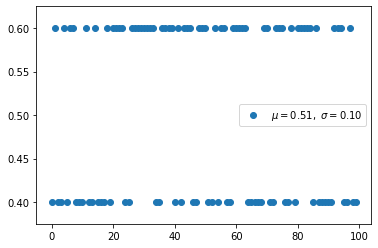

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(p,k):
    return p if k else 1-p

n_experiments = 100
p = 0.6
x = np.arange(n_experiments)
y = []

for _ in range(n_experiments):
    pick = bernoulli(p, k = bool(random.getrandbits(1)))
    y.append(pick)
    
u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label = r'$\mu=%.2f,\ \sigma= %.2f$' % (u, s))
plt.legend()

plt.savefig('figs/bernoulli.png')
plt.show()

### Binomial Distribution (discrete) 二项分布（离散）

#### Pre-requisites:
- There are two potential outcomes per **trial**.
- The probability of **success(p)** is the same across all trials.
- The number of trials(**n**) is fixed.
- Each trial is **independent**.

$$ P(X=x) = C_{n}^{x}\cdot p^x\cdot (1-p)^{n-x} $$   (1)

$$ P(X=x) = ^{n}C_{x}\cdot p^x\cdot (1-p)^{n-x} $$

$$ P(X\geq i) = 1- P(X\leq(i-1)) $$

mean: $  \mu = n\cdot{p} = 30\cdot 0.25 = 7.5 $

standard deviation: $s = \sqrt{n\cdot{p}\cdot{q}} $

- Binomial distribution with **parameters n and p** is the discrete probability distribution of the number of successes in a sequence of n independent experiments.
- Binomial distribution is distribution considered prior probaility by specifying the number to be picked in advance.

#### Examples

https://www.youtube.com/watch?v=3PWKQiLK41M

1. A six-sided die is rolled 12 times. What is the probability of getting 4 five times?

$$ P(X=x) = C_{n}^{x}\cdot p^x\cdot (1-p)^{n-x} $$

$ n=12, x =5, p=\frac{1}{6} q = \frac{5}{6} $

plug into (1)

$ P(X=5) = C_{12}^{5} (\cfrac{1}{6})^5 (\cfrac{5}{6})^7 =0.0284$

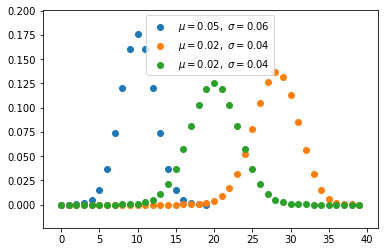

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

# Calculate C(n,r)
def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def binomial(n, p):
    q = 1-p
    y = [const(n,k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

for ls in [(0.5, 20), (0.7, 40), (0.5, 40)]:
    p, n_experiments = ls[0], ls[1]
    x = np.arange(n_experiments)
    y, u, s = binomial(n_experiments, p)
    plt.scatter(x, y, label = r'$\mu=%.2f,\ \sigma= %.2f$' % (u, s))

plt.legend()
plt.savefig('figs/binomial.png')
plt.show()


### Multi-Bernoulli distribution, Categorical distribution (Discrete) 多伯努利分布/分类分布（离散）
- Multi-bernoulli called categorical distribution, is a probability expanded more than 2.
- **Cross entopy** has same form like taking a negative log of the Multi-Bernoulli distribution.**交叉熵**和采取负对数的多伯努利分布具有相同的形式。

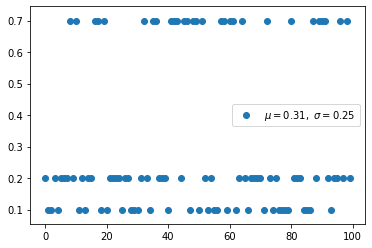

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

def categorical(p, k):
    return p[k]

n_experiments = 100
p = [0.2, 0.1, 0.7]
x = np.arange(n_experiments)
y = []

for _ in range(n_experiments):
    pick = categorical(p, k = random.randint(0, len(p) -1))
    y.append(pick)

u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label = r'$\mu=%.2f,\ \sigma= %.2f$' % (u, s))
plt.legend()
plt.savefig('figs/categorical.png')
plt.show()

### Poisson Distribution 

https://www.youtube.com/watch?v=cPOChr_kuQs

#### Characteristics

- Discrete distribution
- Describe **the number of events occuring in a fixed time interval or region of opportunity.**
- Requires only one parameter, $ \lambda $

#### Assumptions

- **The rate at which events occur is constant.**
- The occurrence of one event does not affect the occurrance of a subsequent event (ie, events are independent).

#### P.M.F. (Probability Mass Function)

$$ P(X=x) = \cfrac{e^{-\lambda}\lambda^{x}}{x!} $$

Poisson Distribution $ \lambda = 3 $

$$ P(X=5) = \cfrac{e^{-3}3^5}{5!} $$

#### C.D.F. (Cumulative Density Function)

$$ P(X \leq x) = \cfrac{\Gamma{(\lfloor x+1 \rfloor, \lambda)}}{\lfloor x! \rfloor} $$

#### Expected Value

$$ E(X) = \lambda $$

#### Variance

$$ V(X) = \lambda $$

#### Examples

https://www.youtube.com/watch?v=m0o-585xwW0

1. A small business receives, on average, 12 customers per day. 
**(a)** what is the probability that the business will receive exactly 8 customers in one day?

$ \mu (\lambda) = 12, x = 8 $

$ P(X= x) = \cfrac{\mu^x e^{-\mu}}{x!} $

$ P(X=8) \approx 0.0655$

---

2. A student receives, on average, 7 text messages in a 2 hour period.
**(a)** What is the probability that the student receives exactly 24 text messages in an 8 hours period?

$ \mu_1 = 7, t_1 = 2 hour $

$ \mu_2 = 28, t_2 = 8 hour $

$\cfrac{u_2}{u_1} = \cfrac{t_2}{t_1} $

...


### Geometric Distribution

#### Examples

https://www.youtube.com/watch?v=d5iAWPnrH6w

1. What is the probability of getting the 1st "6" on the 4th roll using a six-sided die?

$ P(X = x) = (1-p)^{x-1} \cdot p $

$ P(X \leq x) = 1-q^x $, in which $ q = 1 - p $

$ P(X \geq x) = q^{x-1} $

$ P(X > x) = 1- P(X \leq x) = q^x $

$ P(X < x) = 1- q^{x-1} $

$ \mu = \cfrac{1}{p} $

standard deviation: $  s = \sqrt{ \cfrac{1}{p} \cdot \left(\cfrac{1}{p} -1 \right)} $

$ P =  \left(\cfrac{5}{6}\right)\cdot\left(\cfrac{5}{6}\right)\cdot\left(\cfrac{5}{6}\right)\cdot\left(\cfrac{1}{6}\right)$

---
2. 2% of all tires produced by company XYZ has a defect. How many tires would you expect to test until you find the first defective one?

$ \mu = \cfrac{1}{p} = \cfrac{1}{0.02} = 50$


### Hypergeometric Distribution

https://www.youtube.com/watch?v=upVJ4YqTlC4

#### Characteristics

- Discrete Distribution
- Equivalent to the binomial distribution but **WITHOUT REPLACEMENT**.
- The probability of success **changes** with each draw.
- Defined for 3 parameters: N, A and n.
    N: total population size
    A: total items of interest in population
    n: sample size
   For example, if we draw five cards from a set of poker sets, how many spades in the five cards?. In this case, N=52, A=13, n=5

#### P.M.F. (Probability Mass Function)

$$ P(X=x) = \cfrac{\left\lgroup\begin{matrix}A \cr x\end{matrix}\right\rgroup \left\lgroup\begin{matrix}N-A \cr n-x\end{matrix}\right\rgroup}{\left\lgroup\begin{matrix}N \cr n\end{matrix}\right\rgroup } $$

In our example, N=52, A=13, n=5, x = 2 (an example), 

$$ P(X=2) = \cfrac{\left\lgroup\begin{matrix}13 \cr 2\end{matrix}\right\rgroup \left\lgroup\begin{matrix}52-13 \cr 5-2\end{matrix}\right\rgroup}{\left\lgroup\begin{matrix}52 \cr 5\end{matrix}\right\rgroup }  = 0.274$$


#### C.D.F. (Cumulative Density Function)

$$ P(X \leq x) = ??? $$

#### Expected Value

$$ E(X) = n \cfrac{A}{N} $$

#### Variance

$$ V(X) = \cfrac{A}{N}\cdot\cfrac{(N-A)}{N}\cdot\cfrac{(N-n)}{N-1} $$


### Multinomial Distribution(Discrete) 多项式分布（离散）
The multinomial distribution has the same relationship with the categorical distribution as the relationship between Bernoull and Binomial.
多项式分布与分类分布的关系与伯努利分布和二项分布的关系相同。

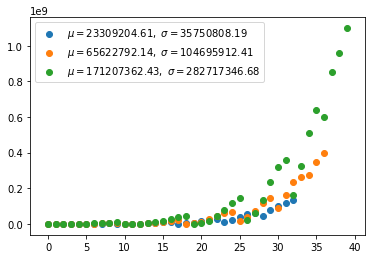

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

def factorial(n):
    return reduce(op.mul, range(1, n+1, 1), 1)

def const(n, a, b, c):
    """
    return n! / (a! * b! *c!), where a+b+c==n
    """
    
    assert a+b+c == n
    numer = factorial(n)
    denom = factorial(a) * factorial(b) * factorial(c)
    return numer / denom

def multinomial(n):
    """
    : param x: list, sum(x) should be 'n'
    : param n: number of trial
    : param p: list sum(p) should be '1'
    """
    
    # get all a,b,c where a+b+c == n, a<b<c
    ls = []
    
    for i in range(1, n+1):
        for j in range(i, n+1):
            for k in range(j, n+1):
                if i+j+k == n:
                    ls.append([i,j,k])
    
    y = [const(n, l[0], l[1], l[2]) for l in ls]
    x = np.arange(len(y))
    return x, y, np.mean(y), np.std(y)

for n_experiments in [20, 21, 22]:
    x, y, u, s = multinomial(n_experiments)
    plt.scatter(x, y, label = r'$\mu=%.2f,\ \sigma= %.2f$' % (u, s))

plt.legend()
plt.savefig('figs/categorical.png')
plt.show()

### Beta Distribution(Continuous) 贝塔分布（连续型）
- Beta distribution is **conjugate to** the binomial and Bernoulli distributions. 贝塔分布与 伯努利分布**共轭**。
- Using conjucation, we can get the posterior distribution more easily using the prior distribution we know. 利用共轭，可以从已知的先验分布很容易地得到后验分布。
- Uniform distiribution is same when beta distribution met special case(alpha=1, beta=1). 当alpha=1, beta=1时，均匀分布是贝塔分布地特例。


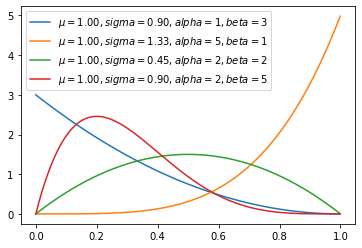

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

# gamma(n) = (n-1)! if n is an integer
def gamma_function(n):
    return reduce(op.mul, range(1, n, 1), 1)

def beta(x, a, b):
    gamma = gamma_function(a+b) / (gamma_function(a) * gamma_function(b))
    
    y = gamma * (x ** (a-1)) * ((1-x) ** (b-1))
    
    return x, y, np.mean(y), np.std(y)

for ls in [(1, 3), (5, 1), (2,2), (2, 5)]:
    a, b = ls[0], ls[1]
    
    # x in [0, 1], trial is 1/0.001 = 1000
    x = np.arange(0, 1, 0.001, dtype = np.float)
    x,y, u, s = beta(x, a=a, b=b)
    plt.plot(x, y, label = r'$\mu = %.2f, sigma = %.2f, alpha=%d, beta =%d$' % (u,s, a, b))

plt.legend()
plt.savefig('figs/beta.png')
plt.show()
        

### Dirichlet 分布（连续型）
- Dirichlet distribution is conjugate to the MultiNomial distribution. 
- if k = 2, it will be Beta distribution


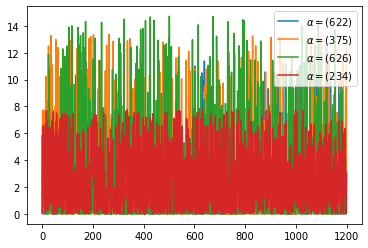

In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

def normalization(x, s):
    """
    :return： normalized list, where sum(x) = s
    """
    return [(i * s) / sum(x) for i in x]

def sampling():
    return normalization([randint(1, 100), randint(1, 100), randint(1, 100)], s=1)

def gamma_function(n):
    return reduce(op.mul, range(1, n, 1), 1)

def beta_function(alpha):
    """
    :param alpha: list, len(alpha) = K
    :return:
    """
    numerator = 1
    for a in alpha:
        numerator *= gamma_function(a)
    denominator = gamma_function(sum(alpha))
    return numerator / denominator

def dirichlet(x, a, n):
    """
    :param x: list of [x[1,2,...,K], x[1,2,...,K],...], shape is (n_trial, K)
    :param a: list of co_efficient, a_i>0
    :param n: number of trial
    :return:
    """
    
    c = (1 / beta_function(a))
    y = [c * (xn[0] ** (a[0] -1)) * (xn[1] ** (a[1] -1)) * 
              (xn[2] ** (a[2] -1)) for xn in x]
    x = np.arange(n)
    
    return x, y, np.mean(y), np.std(y)

n_experiments = 1200
for ls in [(6,2,2), (3,7,5), (6,2,6), (2,3,4)]:
    alpha = list(ls)
    
    # random sampling[x[1, 2, ...,k], x[1,2,..., k],...],shape is (n_trial, k)
    # each sum of row should be one
    x = [sampling() for _ in range(1, n_experiments+1)]
    
    x,y,u,s = dirichlet(x,alpha, n=n_experiments)
    plt.plot(x,y, label=r'$\alpha=(%d%d%d)$' % (ls[0], ls[1], ls[2]))
plt.legend()
plt.savefig('figs/dirichlet.png')
plt.show()

### Gamma distribution (continuous) 伽马分布
Gamma distribution will be beta distribution, if Gamma(a,1) / Gamma(a,1) + Gamma(b,1) is same with Beta(a,b).
The exponential distribution and chi-squared distribution are special cases of the gamma distribution. 指数分布和卡方分布是伽马分布的特例

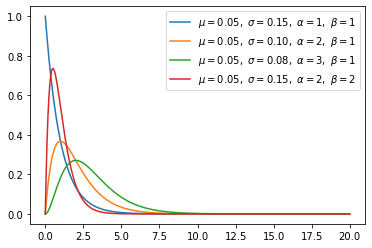

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op

def gamma_function(n):
    return reduce(op.mul, range(1, n, 1), 1)

def gamma(x, a, b):
    c = (b ** a) / gamma_function(a)
    y = c * (x ** (a-1)) * np.exp(-b * x)
    return x, y, np.mean(y), np.std(y)

for ls in [(1, 1), (2, 1), (3, 1), (2, 2)]:
    a, b = ls[0], ls[1]
    x = np.arange(0, 20, 0.01, dtype = np.float)
    x,y,u,s = gamma(x, a, b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.savefig('figs/gamma.png')
plt.show()

### Chi-squared ($ \chi^2$)distribution (Continuous) 卡方分布

- This distribution was "discovered" twice, firstly by Friedrich Robert Helmert, German, in 1875, then, by Karl Pearson in 1900. 

- Can be thought of as the "square" of a selection taken from a standard normal distribution. 

$ \mathit Consider Z_1 \sim N(0,1) $

$ \mathit Consider \;Q = Z_1^2 \sim \chi_1^2 $

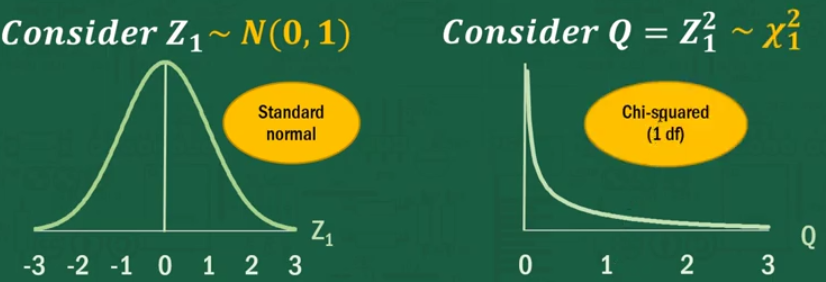

$ \mathit Consider Z_1 and Z_2 both \sim N(0,1) $

$ \mathit Consider \;Q = Z_1^2 + Z_2^2 \sim \chi_2^2 $

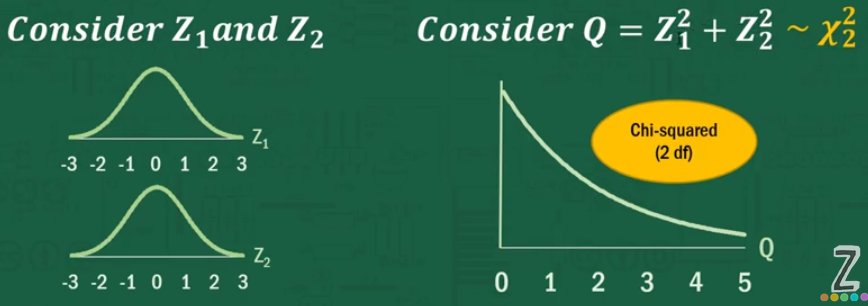

$ \mathit Consider Z_1 , Z_2  and Z_3 all \sim N(0,1) $

$ \mathit Consider \;Q = Z_1^2 + Z_2^2 + Z_3^2 \sim \chi_3^2 $

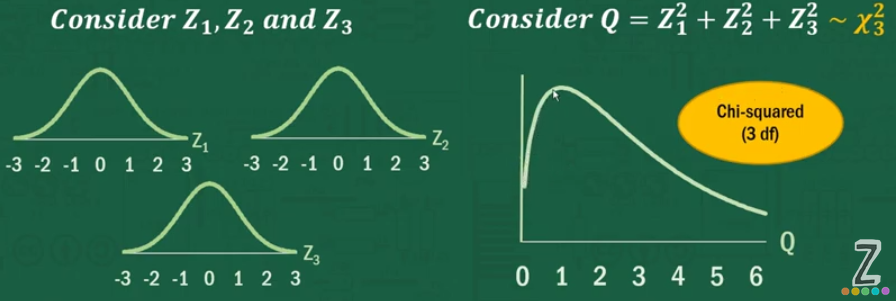

Generally,

$$ Q = \sum_{i=1}^k Z_i^2 \sim \chi_k^2 $$

$$ \mathit Mean = k,  Variance = 2k $$

$ V(A) = E(A^2) - [E(A)]^2 $

$ V(\chi^2) = V(Z_1^2) = E(Z_1^4) - [E(Z_1^2)]^2 = 3-1^2 = 2$

$ V(\chi^2) = V\left(\sum_{i=1}^k Z_i^2 \right) = 2+2+\cdots + 2 =2k $ 
> kurtosis video

- Chi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.
- Chi-square distribution is special case of Beta distribution.

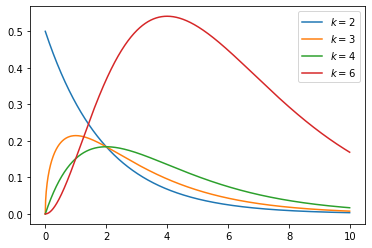

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

def gamma_function(n):
    return reduce(op.mul, range(1, n, 1), 1)

def chi_squared(x, k):
    c = 1 / (2 ** (k/2)) * gamma_function(k//2)
    y = c * (x ** (k/2 - 1)) * np.exp(-x /2)
    
    return x, y, np.mean(y), np.std(y)

for k in [2,3,4,6]:
    x = np.arange(0,10, 0.01, dtype=np.float)
    x,y, _, _ = chi_squared(x, k)
    plt.plot(x, y, label=r'$k=%d$' % (k))

plt.legend()
plt.savefig('figs/chi_squared.png')
plt.show()

### Student-t distribution (continuous) t-分布
- The t-distribution is symmetric and bell-shaped, like the normal distribution, but has heavier tails, meaning that it is more prone to producing values that fall far from its mean.

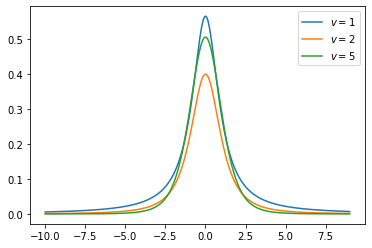

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import operator as op
from functools import reduce

def gamma_function(n):
    return reduce(op.mul, range(1, n, 1), 1)

def student_t(x, freedom, n):
    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)
    c = gamma_function((freedom + 1) // 2) \
        / np.sqrt(freedom * np.pi) * gamma_function(freedom // 2)
    y = c * (1 + x**2 / freedom) ** (-((freedom + 1) / 2))

    return x, y, np.mean(y), np.std(y)

for freedom in [1,2,5]:
    x = np.arange(-10, 10)
    x,y, _, _ = student_t(x, freedom=freedom, n=10000)
    plt.plot(x, y, label=r'$v=%d$' % (freedom))

plt.legend()
plt.savefig('figs/student_t.png')
plt.show()